# First deep neural network

## Loading the data

In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

2023-03-24 13:31:07.096491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
NUM_CLASSES = 10

In [5]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [6]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## Building the model - using a Sequential model

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [8]:
model_seq = Sequential([
    Dense(200, activation="relu", input_shape=(32, 32, 32)),
    Flatten(),
    Dense(150, activation="relu"),
    Dense(10, activation="softmax")
])

2023-03-24 13:31:14.332109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Building the model - using the functional API

In [9]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

In [10]:
input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)
x = Dense(units=200, activation="relu")(x)
x = Dense(units=150, activation="relu")(x)

output_layer = Dense(units=10, activation="softmax")(x)

model_func = Model(input_layer, output_layer)

## Compiling the Model

In [11]:
from keras.optimizers import Adam

In [12]:
model = model_func
opt = Adam(lr=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/Users/adriano.gil/workspace/python/ml/nnstudy/.env/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Training the Model

In [13]:
model.fit(
    x_train, 
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8518 - accuracy: 0.3348
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6677 - accuracy: 0.4020
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5925 - accuracy: 0.4335
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5401 - accuracy: 0.4512
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4984 - accuracy: 0.4678
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4691 - accuracy: 0.4767
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4396 - accuracy: 0.4877
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4114 - accuracy: 0.4981
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3946 - accuracy: 0.5075
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.376

## Evaluating the Model

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.4751 - accuracy: 0.4788


[1.4751367568969727, 0.4787999987602234]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 2ms/step


In [18]:
import matplotlib.pyplot as plt

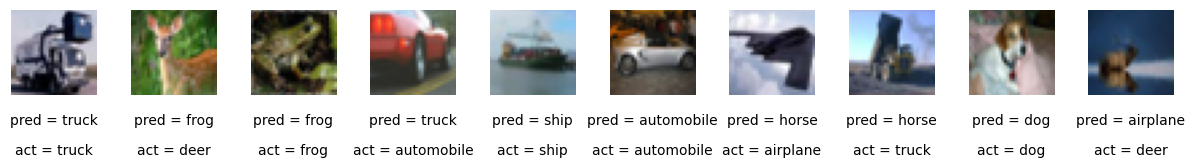

In [20]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)